### Exercise on MLP configuration
##### Duarte Balata (46304) Miguel Oliveira (55772)

Importing the required packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import concatenate
import numpy as np
import matplotlib.pyplot as plt

### Defining the Architectures

Below we are building two different architectures in order to compare both their performance on learning the XOR problem. We defined the function used build the two MLP architectures. In both configurations the models are trained for 10.000 epochs in order to assure convergence.

* Model_1 is the MLP with 2 inputs, 2 hidden neurons and 1 output neuron with complete forward connections. 
* Model_2 is the MLP with 2 inputs, 1 hidden neuron, 1 output neuron and shortcut connections.

For Model_2 a concatenation layer for both the input and hidden layers was used for the shortcut connection.

Please note, that the activation function and momentum will vary according to the experiments performed as per the task. The architecture can also be understood by it's summary and structure plot that provides a visual representation of the MLP.

In addition, the metrics that will be collected to evaluate the performance of our models will be average accuracy and loss and its standard deviation. The Loss is defined by a value that demonstrates a loss for every poor decision, the higher the loss value the worst the model predicted an instance. The loss value in both architecures is the "mean_squared_error". This formula calculates the average squared difference between the predicted values by the model and the actual values. 

In [13]:
def model_1(X, y, hidden_activation="sigmoid", momentum=0, lr=0.1, mod=False):

    input_layer = Input(shape=(2,))
    hidden_layer = Dense(2, activation=hidden_activation)(input_layer)
    output_layer = Dense(1, activation="sigmoid")(hidden_layer)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=lr, momentum=momentum), metrics=["accuracy"])
    history = model.fit(X, y, epochs=10000, batch_size=1, verbose=0)

    avg_acc = np.mean(history.history["acc"])
    avg_loss = np.mean(history.history["loss"])
    std_acc = np.std(history.history["acc"])
    std_loss = np.std(history.history["loss"])
    
    if mod == True:
        return model
    
    return avg_acc, avg_loss, std_acc, std_loss

def model_2(X, y, hidden_activation="sigmoid", momentum=0, lr=0.1, mod=False):
    input_layer = Input(shape=(2,))
    hidden_layer = Dense(1,activation=hidden_activation)(input_layer)
    concat = concatenate([input_layer, hidden_layer])
    
    output_layer = Dense(1, activation='sigmoid')(concat)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=lr, momentum=momentum), metrics=["accuracy"])
    history = model.fit(X, y, epochs=10000, batch_size=1, verbose=0)
    
    avg_acc = np.mean(history.history["acc"])
    avg_loss = np.mean(history.history["loss"])
    std_acc = np.std(history.history["acc"])
    std_loss = np.std(history.history["loss"])
    
    if mod == True:
        return model
    
    return avg_acc, avg_loss, std_acc, std_loss

A function is defined to run each MLP 5 times and get the average accuracy and loss statistics from the runs.

In [3]:
def run5times(model1, model2):
    avg_acc_1_total = 0
    avg_acc_2_total = 0
    avg_loss_1_total = 0
    avg_loss_2_total = 0
    std_acc_1_total = 0
    std_acc_2_total = 0
    std_loss_1_total = 0
    std_loss_2_total = 0

    for i in range(0,5):
        avg_acc_1, avg_loss_1, std_acc_1, std_loss_1 = model1
        avg_acc_2, avg_loss_2, std_acc_2, std_loss_2 = model2

        avg_acc_1_total += avg_acc_1
        avg_acc_2_total += avg_acc_2
        avg_loss_1_total += avg_loss_1
        avg_loss_2_total += avg_loss_2
        std_acc_1_total += std_acc_1
        std_acc_2_total += std_acc_2
        std_loss_1_total += std_loss_1
        std_loss_2_total += std_loss_2

    avg_acc_1_mean = round(avg_acc_1_total/5, 2)
    avg_acc_2_mean = round(avg_acc_2_total/5, 2)
    avg_loss_1_mean = round(avg_loss_1_total/5, 2)
    avg_loss_2_mean = round(avg_loss_2_total/5, 2)
    std_acc_1_mean = round(std_acc_1_total/5, 2)
    std_acc_2_mean = round(std_acc_2_total/5, 2)
    std_loss_1_mean = round(std_loss_1_total/5, 2)
    std_loss_2_mean = round(std_loss_2_total/5, 2)

    print("Model 1:\n" + "Average accuracy = " + str(avg_acc_1_mean) + " ± " + str(std_acc_1_mean) + "\nAverage loss = " + str(avg_loss_1_mean) + " ± " + str(std_loss_1_mean) + "\n")
    print("Model 2:\n" + "Average accuracy = " + str(avg_acc_2_mean) + " ± " + str(std_acc_2_mean) + "\nAverage loss = " + str(avg_loss_2_mean) + " ± " + str(std_loss_2_mean) + "\n")

    return [avg_acc_1_mean, std_acc_1_mean, avg_loss_1_mean, std_loss_1_mean], [avg_acc_2_mean, std_acc_2_mean, avg_loss_2_mean, std_loss_2_mean]
    
    #print((model_1_A.predict(X)>0.5).astype("int32"), "\n\n", (model_2_A.predict(X)>0.5).astype("int32"))

We then graphically represent the architecure of MLP 1 (2 inputs, 2 hidden neurons and 1 output neuron with complete forward connections)

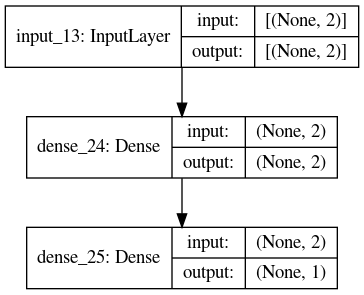

In [17]:
model_1_A = model_1(X, y, hidden_activation="sigmoid", mod=True)
plot_model(model_1_A, show_shapes=True)

Then, we represent the architecure of MLP 2 (2 inputs, 1 hidden neuron, 1 output neuron and shortcut connections)

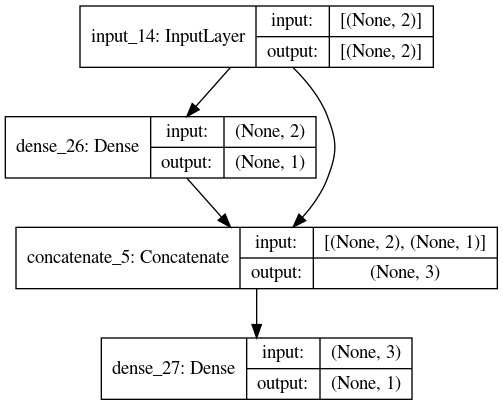

In [18]:
model_2_A = model_2(X, y, hidden_activation="sigmoid", mod=True)
plot_model(model_2_A, show_shapes=True)

#### Next, we run our models 5 times for each of the presented situations and store the obtained statistics.

## A) 
Hidden neurons with logistic activation function.

Data set with binary values in {0, 1}.

Standard backpropagation algorithm.

In [5]:
X = np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
y = np.array([[0],[1],[1],[0]],"float32")

A_1_stats, A_2_stats = run5times(model_1(X, y, hidden_activation="sigmoid"), 
                                 model_2(X, y, hidden_activation="sigmoid"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model 1:
Average accuracy = 0.54 ± 0.09
Average loss = 0.14 ± 0.03

Model 2:
Average accuracy = 0.96 ± 0.14
Average loss = 0.04 ± 0.07



## B)

Hidden neurons with hyperbolic tangent activation function.

Data set with binary values in {-1, 1}.

Backpropagation with momentum algorithm.

In [6]:
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]],"float32")
y = np.array([[0],[1],[1],[0]],"float32")

B_1_stats, B_2_stats = run5times(model_1(X, y, hidden_activation="tanh", momentum=0.9),
                                 model_2(X, y, hidden_activation="tanh", momentum=0.9))

Model 1:
Average accuracy = 0.67 ± 0.12
Average loss = 0.13 ± 0.01

Model 2:
Average accuracy = 1.0 ± 0.02
Average loss = 0.0 ± 0.01



## C) 

Hidden neurons with relu activation function.

Data set with binary values in {0, 1}.

Standard backpropagation algorithm.

In [7]:
X = np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
y = np.array([[0],[1],[1],[0]],"float32")

C_1_stats, C_2_stats = run5times(model_1(X, y, hidden_activation="relu"),
                                 model_2(X, y, hidden_activation="relu"))

Model 1:
Average accuracy = 0.75 ± 0.02
Average loss = 0.17 ± 0.01

Model 2:
Average accuracy = 0.24 ± 0.18
Average loss = 0.26 ± 0.0



## D)

Hidden neurons with relu activation function.

Data set with binary values in {0, 1}.

Backpropagation with momentum algorithm.

In [8]:
X = np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
y = np.array([[0],[1],[1],[0]],"float32")

D_1_stats, D_2_stats = run5times(model_1(X, y, hidden_activation="relu", momentum=0.9),
                                 model_2(X, y, hidden_activation="relu", momentum=0.9))

Model 1:
Average accuracy = 0.75 ± 0.01
Average loss = 0.17 ± 0.0

Model 2:
Average accuracy = 1.0 ± 0.02
Average loss = 0.0 ± 0.01



### Statistics

We compile the MLP statistics in order to plot the final results.

In [9]:
model_1_accs_means = [A_1_stats[0],B_1_stats[0],C_1_stats[0],D_1_stats[0]]
model_1_accs_std = [A_1_stats[1],B_1_stats[1],C_1_stats[1],D_1_stats[1]]
model_1_loss_means = [A_1_stats[2],B_1_stats[2],C_1_stats[2],D_1_stats[2]]
model_1_loss_std = [A_1_stats[3],B_1_stats[3],C_1_stats[3],D_1_stats[3]]

model_2_accs_means = [A_2_stats[0],B_2_stats[0],C_2_stats[0],D_2_stats[0]]
model_2_accs_std = [A_2_stats[1],B_2_stats[1],C_2_stats[1],D_2_stats[1]]
model_2_loss_means = [A_2_stats[2],B_2_stats[2],C_2_stats[2],D_2_stats[2]]
model_2_loss_std = [A_2_stats[3],B_2_stats[3],C_2_stats[3],D_2_stats[3]]

#### Accuracy
We plot the obtained average accuracy scores for each situation, using each one of the MLP architectures.

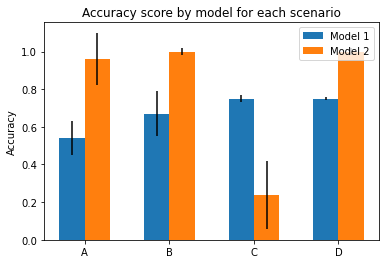

In [19]:
labels = ["A","B","C","D"]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model_1_accs_means, width, label='Model 1', yerr=model_1_accs_std)
rects2 = ax.bar(x + width/2, model_2_accs_means, width, label='Model 2', yerr=model_2_accs_std)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score by model for each scenario')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

It is possible to noticed that, on average, MLP 2 performs better on situations A, B and D, while MLP 1 only performs better in situation C.

For MPL 1 the worst performance is in situation A at 54% - however the remaining performances, while better, are still below 75%. MPL 2 has a low accuracy of 24% for C but in the other situations it's accuracy is very close to 100%. As the standard deviation results are close to 0, we can assume the results to be somewhat consistent in the 5 runs. Overall for both MPL's the best performance was on situation D.

It is curious that both situations C and D had such different results for MLP 2 with only one difference amongst them which was the use standard backpropagation (C) versus a backpropgation with momentum algorithm (D). The objective of using momentum is to obtain an improved gradient that accelarates the descend and therefore the learning. In this case, we were able to observe that using momentum improved the accuracy of the results MPL 2 a lot, however it did not have much of an influence on MPL 1.



#### Loss

Finally, we do the same representation for the loss statistic and draw the same results and the previous representation.

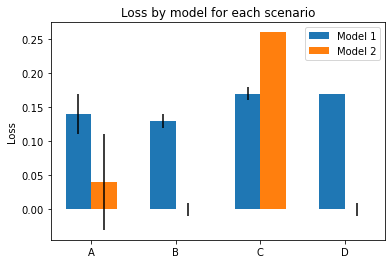

In [20]:
labels = ["A","B","C","D"]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model_1_loss_means, width, label='Model 1', yerr=model_1_loss_std)
rects2 = ax.bar(x + width/2, model_2_loss_means, width, label='Model 2', yerr=model_2_loss_std)

ax.set_ylabel('Loss')
ax.set_title('Loss by model for each scenario')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

The graph plotted above shows that Loss was generally lower for MPL 2 except for situation C. On situation B and D where momentum was used , the Loss is 0. We can argue that this was due to the fact that with momentum creating a Stocastic Gradient Descend the model with a shortcut connection was able to reach the local global minima faster and thus achieved a lower loss value. For MPL 1 the loss value is higher and more consistent accross all situations.